# Lennard Jones fluid

## 初期化だけして何もしないスクリプト

In [3]:
!cat input_01.lammps

# 1) Initialization
units lj
dimension 3
atom_style atomic
pair_style lj/cut 2.5  # interact through a LEnnard-Jones potential with a cut-off 2.5 (unitless).
boundary p p p


In [2]:
!/home/guest/src/miniconda/envs/lmp_tutorial/bin/lmp -in input_01.lammps -l input_01.log

LAMMPS (2 Aug 2023 - Update 1)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Total wall time: 0:00:00


## 系の定義

In [4]:
!cat input_02.lammps

# 2) System definition
region simulation_box block -20 20 -20 20 -20 20
create_box 2 simulation_box  # 2 atom types are used in simulation box
create_atoms 1 random 1500 341341 simulation_box  # 1500 atoms of atom type 1 are created at random positions based on seed 341341
create_atoms 2 random 100 127569 simulation_box  # 100 atoms of atom type 2 are created at random positions based on seed 127569


In [3]:
!/home/guest/src/miniconda/envs/lmp_tutorial/bin/lmp -in input_02.lammps -l input_02.log

LAMMPS (2 Aug 2023 - Update 1)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Created orthogonal box = (-20 -20 -20) to (20 20 20)
  1 by 1 by 1 MPI processor grid
Created 1500 atoms
  using lattice units in orthogonal box = (-20 -20 -20) to (20 20 20)
  create_atoms CPU = 0.001 seconds
Created 100 atoms
  using lattice units in orthogonal box = (-20 -20 -20) to (20 20 20)
  create_atoms CPU = 0.000 seconds
Total wall time: 0:00:00


## 質量とポテンシャルの設定

In [5]:
!cat input_03.lammps

# 1) Initialization
units lj
dimension 3
atom_style atomic
pair_style lj/cut 2.5  # interact through a LEnnard-Jones potential with a cut-off 2.5 (unitless).
boundary p p p

# 2) System definition
region simulation_box block -20 20 -20 20 -20 20
create_box 2 simulation_box  # 2 atom types are used in simulation box
create_atoms 1 random 1500 341341 simulation_box  # 1500 atoms of atom type 1 are created at random positions based on seed 341341
create_atoms 2 random 100 127569 simulation_box  # 100 atoms of atom type 2 are created at random positions based on seed 127569

# 3) Simulation settings
mass 1 1  # mass atomtype weight
mass 2 1  # mass atomtype weight
pair_coeff 1 1 1.0 1.0
pair_coeff 2 2 0.5 3.0


In [6]:
!/home/guest/src/miniconda/envs/lmp_tutorial/bin/lmp -in input_03.lammps -l input_03.log

LAMMPS (2 Aug 2023 - Update 1)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Created orthogonal box = (-20 -20 -20) to (20 20 20)
  1 by 1 by 1 MPI processor grid
Created 1500 atoms
  using lattice units in orthogonal box = (-20 -20 -20) to (20 20 20)
  create_atoms CPU = 0.000 seconds
Created 100 atoms
  using lattice units in orthogonal box = (-20 -20 -20) to (20 20 20)
  create_atoms CPU = 0.000 seconds
Total wall time: 0:00:00


## エネルギー最小化

In [7]:
!cat input_04.lammps

# 1) Initialization
units lj
dimension 3
atom_style atomic
pair_style lj/cut 2.5  # interact through a LEnnard-Jones potential with a cut-off 2.5 (unitless).
boundary p p p

# 2) System definition
region simulation_box block -20 20 -20 20 -20 20
create_box 2 simulation_box  # 2 atom types are used in simulation box
create_atoms 1 random 1500 341341 simulation_box  # 1500 atoms of atom type 1 are created at random positions based on seed 341341
create_atoms 2 random 100 127569 simulation_box  # 100 atoms of atom type 2 are created at random positions based on seed 127569

# 3) Simulation settings
mass 1 1  # mass atomtype weight
mass 2 1  # mass atomtype weight
pair_coeff 1 1 1.0 1.0
pair_coeff 2 2 0.5 3.0

# 4) Visualization
thermo 10

# 5) Run
minimize 1.0e-4 1.0e-6 1000 10000


In [8]:
!/home/guest/src/miniconda/envs/lmp_tutorial/bin/lmp -in input_04.lammps -l input_04.log

LAMMPS (2 Aug 2023 - Update 1)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Created orthogonal box = (-20 -20 -20) to (20 20 20)
  1 by 1 by 1 MPI processor grid
Created 1500 atoms
  using lattice units in orthogonal box = (-20 -20 -20) to (20 20 20)
  create_atoms CPU = 0.001 seconds
Created 100 atoms
  using lattice units in orthogonal box = (-20 -20 -20) to (20 20 20)
  create_atoms CPU = 0.000 seconds
Generated 1 of 1 mixed pair_coeff terms from geometric mixing rule
Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 2.8
  ghost atom cutoff = 2.8
  binsize = 1.4, bins = 29 29 29
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair lj/cut, perpetual
      attributes: half, newton on
      pair build: half/bin/atomonly/newton
      stencil: half/bin/3d
      bin: standard
Setting up cg s

## MD simulation

In [13]:
!cat input_05.lammps

# 1) Initialization
units lj
dimension 3
atom_style atomic
pair_style lj/cut 2.5  # interact through a LEnnard-Jones potential with a cut-off 2.5 (unitless).
boundary p p p

# 2) System definition
region simulation_box block -20 20 -20 20 -20 20
create_box 2 simulation_box  # 2 atom types are used in simulation box
create_atoms 1 random 1500 341341 simulation_box  # 1500 atoms of atom type 1 are created at random positions based on seed 341341
create_atoms 2 random 100 127569 simulation_box  # 100 atoms of atom type 2 are created at random positions based on seed 127569

# 3) Simulation settings
mass 1 1  # mass atomtype weight
mass 2 1  # mass atomtype weight
pair_coeff 1 1 1.0 1.0
pair_coeff 2 2 0.5 3.0

# 4) Visualization
thermo 10  # visualize per 10 steps

# 5) Run
minimize 1.0e-4 1.0e-6 1000 10000  # energy-diff force-diff max-iter force-and-energy-evalution-times(?)


# PART B - MOLECULAR DYNAMICS
# 4) Visualization
thermo 1000
variable kinetic_energy equal ke
variable potential

### fix ave/time

https://docs.lammps.org/fix_ave_time.html

```text
fix ID group-ID ave/time Nevery Nrepeat Nfreq value1 value2 ... keyword args ...
```

- ID, group-ID are documented in fix command
- ave/time = style name of this fix command
- Nevery = use input values every this many time steps
- Nrepeat = # of times to use input values for calculating averages
- Nfreq = calculate averages every this many time steps
- one or more input values can be listed
- value = c_ID, c_ID[N], f_ID, f_ID[N], v_name

In [14]:
!/home/guest/src/miniconda/envs/lmp_tutorial/bin/lmp -in input_05.lammps -l input_05.log

LAMMPS (2 Aug 2023 - Update 1)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Created orthogonal box = (-20 -20 -20) to (20 20 20)
  1 by 1 by 1 MPI processor grid
Created 1500 atoms
  using lattice units in orthogonal box = (-20 -20 -20) to (20 20 20)
  create_atoms CPU = 0.000 seconds
Created 100 atoms
  using lattice units in orthogonal box = (-20 -20 -20) to (20 20 20)
  create_atoms CPU = 0.000 seconds
Generated 1 of 1 mixed pair_coeff terms from geometric mixing rule
Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 2.8
  ghost atom cutoff = 2.8
  binsize = 1.4, bins = 29 29 29
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair lj/cut, perpetual
      attributes: half, newton on
      pair build: half/bin/atomonly/newton
      stencil: half/bin/3d
      bin: standard
Setting up cg s

最後のログの `Dangerous builds` が 0 でない場合には、
```text
neigh_modify every 1 delay 5 check yes
```
などとする必要がある。


```text
This is an indication that something is wrong: some atoms have moved more than expected in between two calculations of the neighbor lists. Let us add the following command in the Simulation settings section:

neigh_modify every 1 delay 5 check yes

With this command, LAMMPS will rebuild the neighbor lists more often. Re-run the simulation, and you should see a more positive outcome with 0 dangerous build:
```

In [4]:
import pandas as pd
import subprocess

columns = subprocess.run("sed -n 2p energy.dat".split(), capture_output=True, text=True).stdout.strip().split()[1:]
data = pd.read_table('energy.dat', skiprows=2, header=None, sep=' ').rename(columns={i: name for i, name in enumerate(columns)})

<Axes: xlabel='TimeStep'>

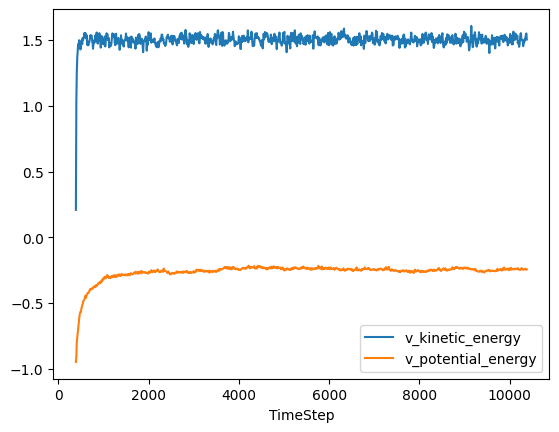

In [5]:
data.plot(x='TimeStep')

## trajectry の保存

In [18]:
!cat input_06.lammps

# 1) Initialization
units lj
dimension 3
atom_style atomic
pair_style lj/cut 2.5  # interact through a LEnnard-Jones potential with a cut-off 2.5 (unitless).
boundary p p p

# 2) System definition
region simulation_box block -20 20 -20 20 -20 20
create_box 2 simulation_box  # 2 atom types are used in simulation box
create_atoms 1 random 1500 341341 simulation_box  # 1500 atoms of atom type 1 are created at random positions based on seed 341341
create_atoms 2 random 100 127569 simulation_box  # 100 atoms of atom type 2 are created at random positions based on seed 127569

# 3) Simulation settings
mass 1 1  # mass atomtype weight
mass 2 1  # mass atomtype weight
pair_coeff 1 1 1.0 1.0
pair_coeff 2 2 0.5 3.0

# 4) Visualization
thermo 10  # visualize per 10 steps

# 5) Run
minimize 1.0e-4 1.0e-6 1000 10000  # energy-diff force-diff max-iter force-and-energy-evalution-times(?)


# PART B - MOLECULAR DYNAMICS
# 4) Visualization
thermo 1000
variable kinetic_energy equal ke
variable potential

In [17]:
!/home/guest/src/miniconda/envs/lmp_tutorial/bin/lmp -in input_06.lammps -l input_06.log

LAMMPS (2 Aug 2023 - Update 1)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Created orthogonal box = (-20 -20 -20) to (20 20 20)
  1 by 1 by 1 MPI processor grid
Created 1500 atoms
  using lattice units in orthogonal box = (-20 -20 -20) to (20 20 20)
  create_atoms CPU = 0.000 seconds
Created 100 atoms
  using lattice units in orthogonal box = (-20 -20 -20) to (20 20 20)
  create_atoms CPU = 0.000 seconds
Generated 1 of 1 mixed pair_coeff terms from geometric mixing rule
Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 2.8
  ghost atom cutoff = 2.8
  binsize = 1.4, bins = 29 29 29
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair lj/cut, perpetual
      attributes: half, newton on
      pair build: half/bin/atomonly/newton
      stencil: half/bin/3d
      bin: standard
Setting up cg s

In [4]:
from ase.io import read

# structures = read('./output.dump', format='lammps-dump-text', index=':')
structures = read('./dump.lammpstrj', format='lammps-dump-text', index=':')
structures

[Atoms(symbols='H1500He100', pbc=True, cell=[40.0, 40.0, 40.0]),
 Atoms(symbols='H1500He100', pbc=True, cell=[40.0, 40.0, 40.0]),
 Atoms(symbols='H1500He100', pbc=True, cell=[40.0, 40.0, 40.0]),
 Atoms(symbols='H1500He100', pbc=True, cell=[40.0, 40.0, 40.0]),
 Atoms(symbols='H1500He100', pbc=True, cell=[40.0, 40.0, 40.0]),
 Atoms(symbols='H1500He100', pbc=True, cell=[40.0, 40.0, 40.0]),
 Atoms(symbols='H1500He100', pbc=True, cell=[40.0, 40.0, 40.0]),
 Atoms(symbols='H1500He100', pbc=True, cell=[40.0, 40.0, 40.0]),
 Atoms(symbols='H1500He100', pbc=True, cell=[40.0, 40.0, 40.0]),
 Atoms(symbols='H1500He100', pbc=True, cell=[40.0, 40.0, 40.0])]

In [23]:
from ase.visualize import view

view(structures, viewer='ngl')

## 保存した構造からリスタートする

よくわからん。